In [26]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
taille_image = (64, 64)
bases_donnees = {
    "UCSDped1": r"C:\Users\Ichrak\Desktop\Mission entreprise\UCSD_Anomaly_Dataset.v1p2\UCSDped1",
    "UCSDped2": r"C:\Users\Ichrak\Desktop\Mission entreprise\UCSD_Anomaly_Dataset.v1p2\UCSDped2"
}
mode = "Train"

UCSDped1 - Images Train chargées : (6800, 64, 64)


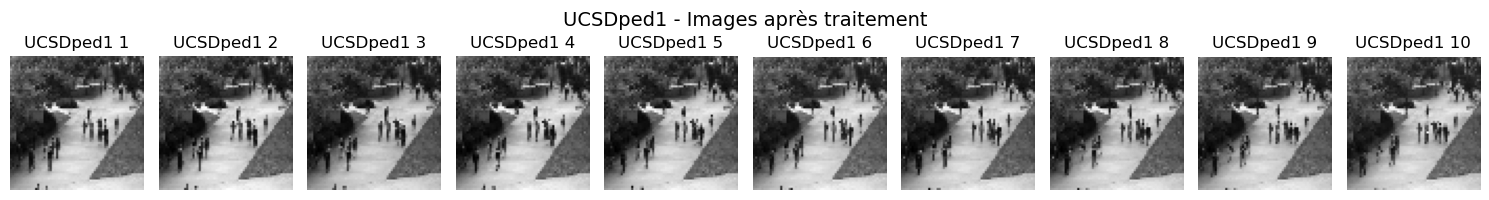

UCSDped1 - Prétraitement terminé avec succès.
UCSDped2 - Images Train chargées : (2550, 64, 64)


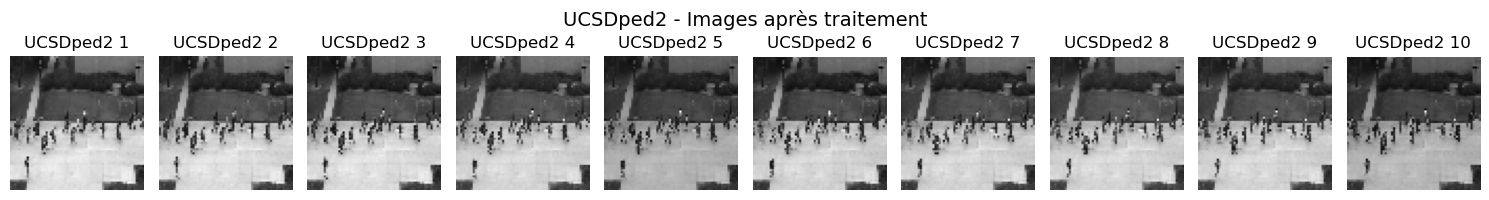

UCSDped2 - Prétraitement terminé avec succès.


In [28]:
def lire_image(chemin_image):
    if not chemin_image.lower().endswith(".tif"):
        return None
    img = cv2.imread(chemin_image, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Image introuvable ou corrompue :", chemin_image)
        return None
    img = cv2.resize(img, taille_image)
    img = img.astype('float32') / 255.0
    return img

for nom_dataset, dossier_base in bases_donnees.items():
    chemin_donnees = os.path.join(dossier_base, mode)
    
    clips = sorted([
        nom for nom in os.listdir(chemin_donnees)
        if os.path.isdir(os.path.join(chemin_donnees, nom))
    ])
    
    toutes_les_images = []
    for clip in clips:
        chemin_clip = os.path.join(chemin_donnees, clip)
        images = sorted(os.listdir(chemin_clip))
        for nom_img in images:
            chemin_img = os.path.join(chemin_clip, nom_img)
            img = lire_image(chemin_img)
            if img is not None:
                toutes_les_images.append(img)
    
    toutes_les_images = np.array(toutes_les_images)
    print(f"{nom_dataset} - Images {mode} chargées : {toutes_les_images.shape}")
    
    nb_afficher = 10
    plt.figure(figsize=(15, 2))
    for i in range(min(nb_afficher, len(toutes_les_images))):
        plt.subplot(1, nb_afficher, i + 1)
        plt.imshow(toutes_les_images[i], cmap='gray')
        plt.axis('off')
        plt.title(f"{nom_dataset} {i+1}")
    plt.suptitle(f"{nom_dataset} - Images après traitement", fontsize=14)
    plt.tight_layout()
    plt.show()
    
    print(f"{nom_dataset} - Prétraitement terminé avec succès.")